In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importando Componentes

In [ ]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab_Notebooks

/content/drive/MyDrive/Colab_Notebooks


# Leitura da Imagem

In [ ]:
original_image = cv2.imread("Segmenta.png")

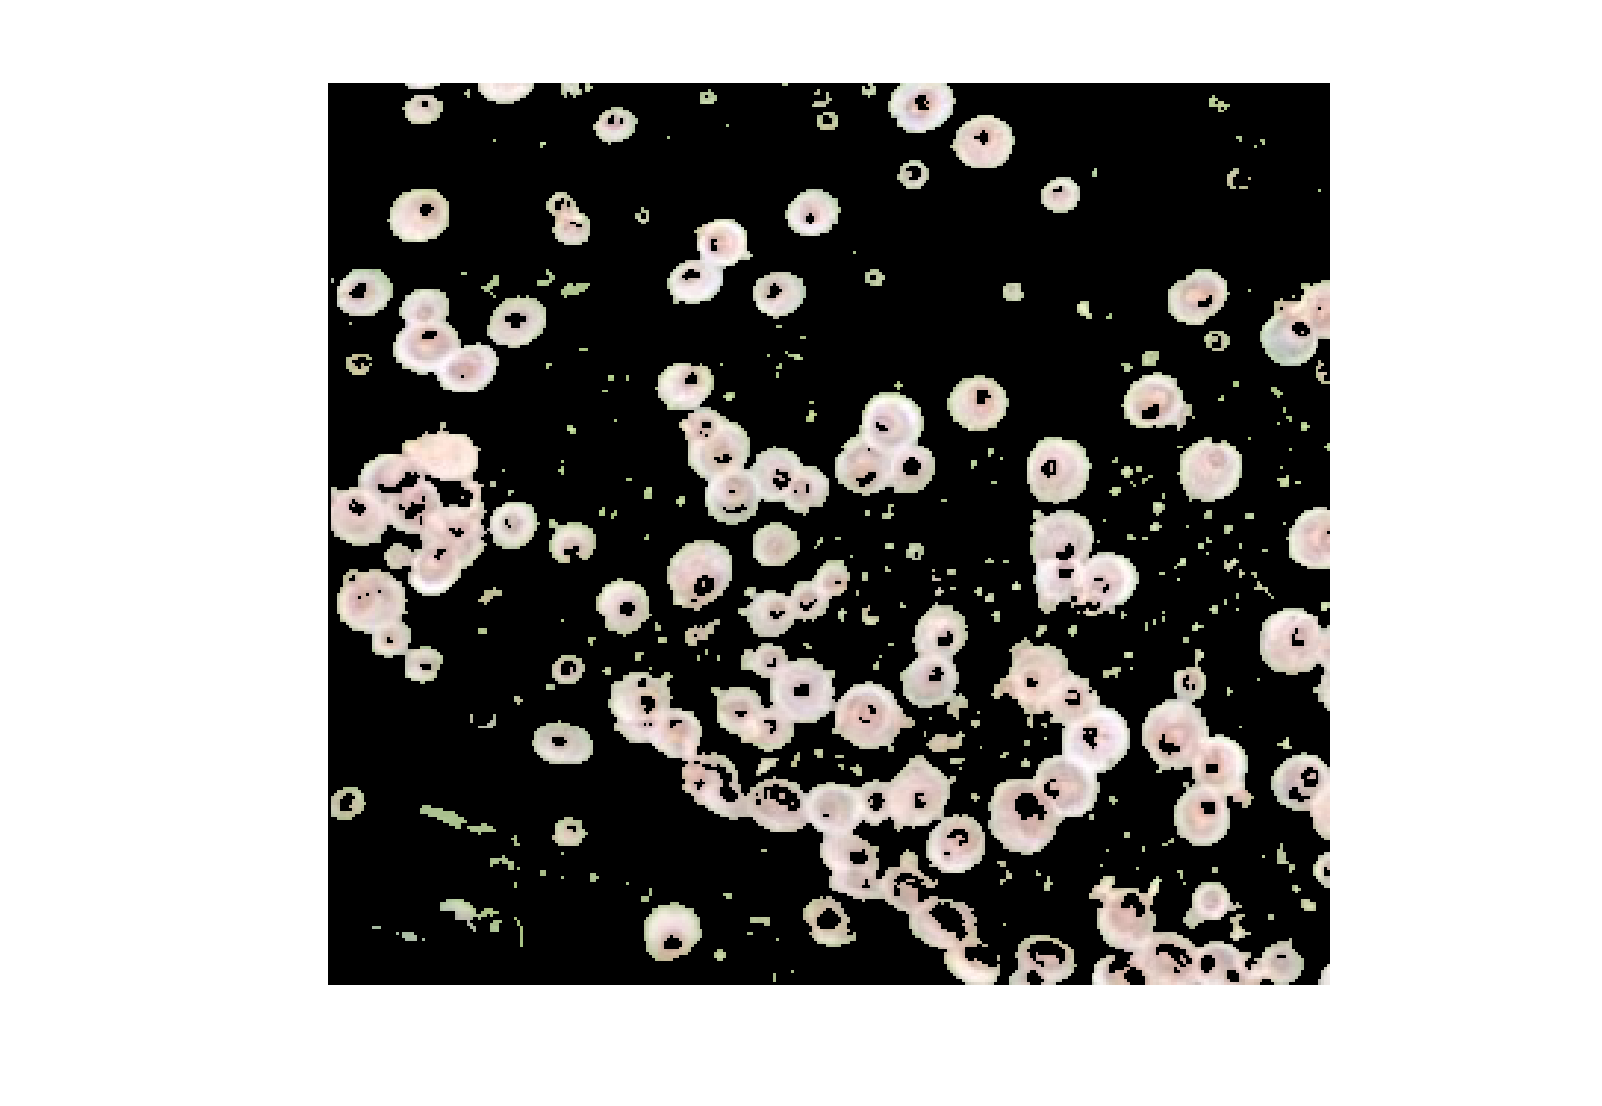

In [ ]:
cv2_imshow(original_image);

# Manipulação da Imagem

In [ ]:
img = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

In [ ]:
#img = cv2.cvtColor(original_image,cv2.COLOR_BGR2HSV)

HSV -> AUMENTA A INTENSIDADE DOS PONTOS Brancos (Favilita até a identificação das cochinilhas de 1º insta)

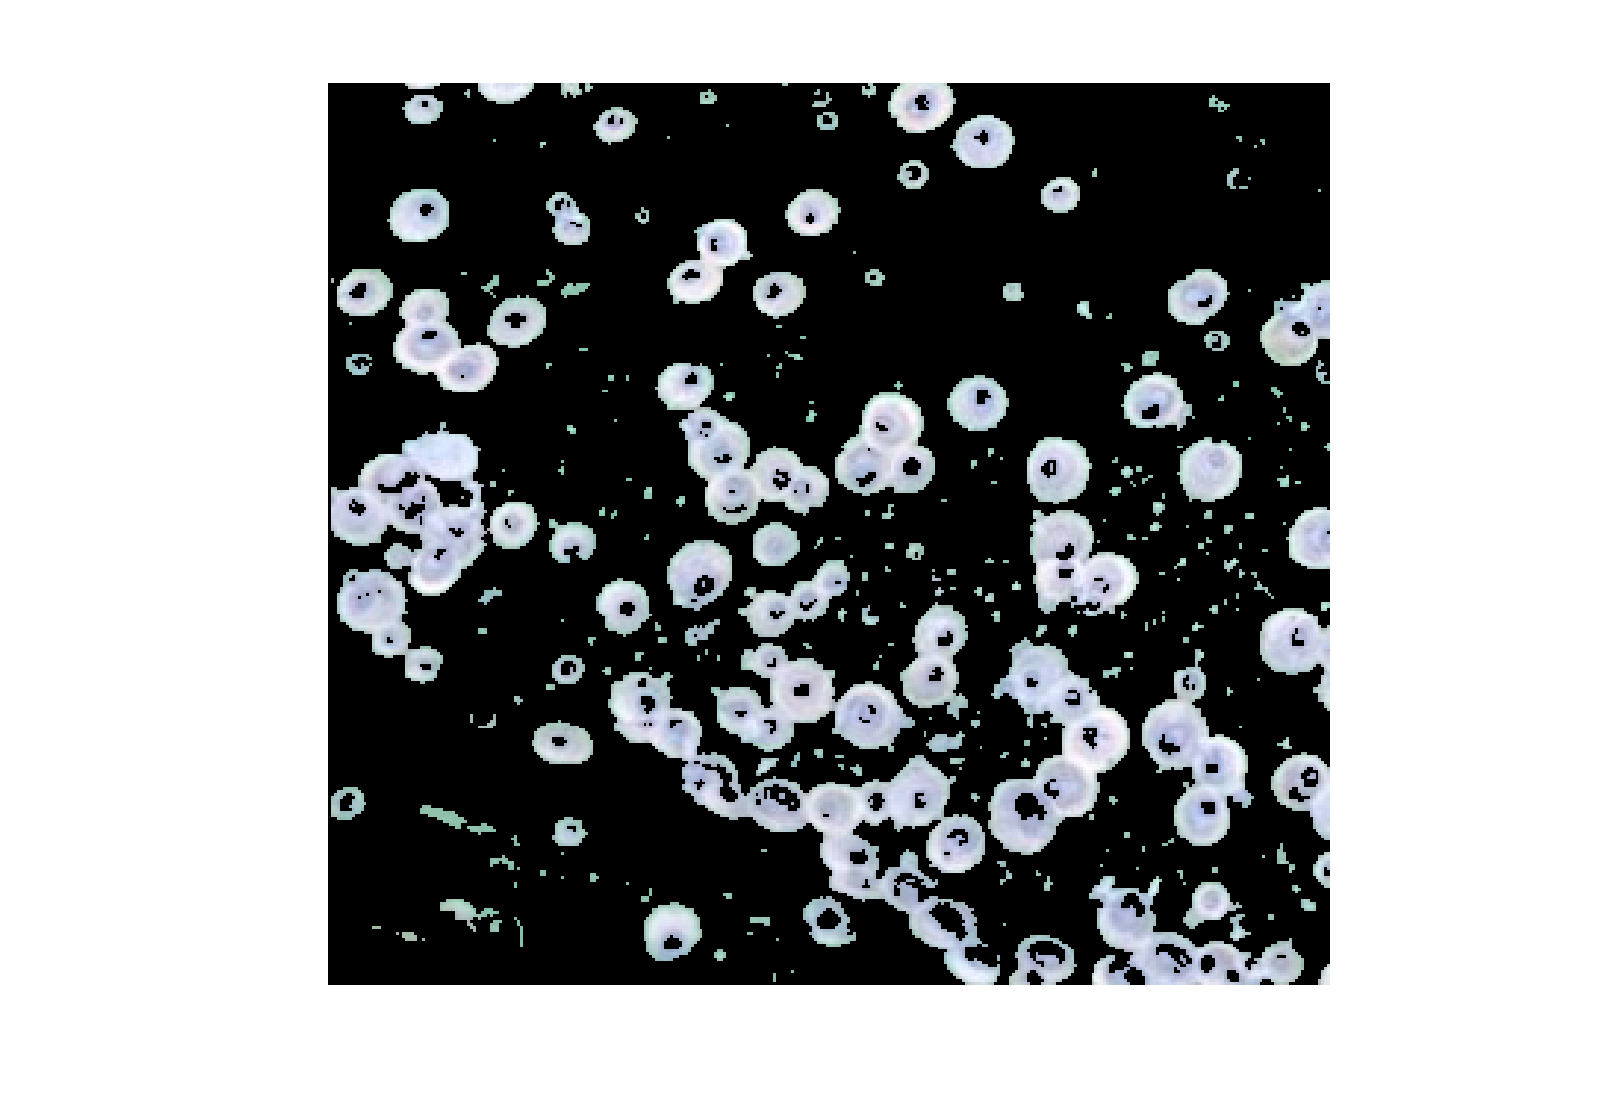

In [ ]:
cv2_imshow(img);

In [ ]:
print(img.shape)

(1106, 1602, 3)


In [ ]:
vectorized = img.reshape((-1,3))

In [ ]:
print(vectorized.shape)

(1771812, 3)


Multiplicou largura x comprimento -> 3 Colunas se tornaram 2

In [ ]:
vectorized = np.float32(vectorized)

In [ ]:
print(vectorized)

[[255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]
 ...
 [255. 255. 255.]
 [255. 255. 255.]
 [255. 255. 255.]]


Converteu para float (decimais)


# Uso de ML:

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

Criteria = Criterios -> 3 Flags / 3 parametros -> Termina a interação quano qualquer uma das condições for realizadas.


---


EPS = Tolerancia


---


Max_Iter = Maximo de iterações


---
+ -> OU



In [ ]:
print(criteria)

(3, 10, 1.0)


Link de estudo: https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html


---


3 -> Parametros;

In [ ]:
K = 8
attempts = 10
ret, label, center = cv2.kmeans(vectorized, K , None , criteria , attempts , cv2.KMEANS_PP_CENTERS) 

In [ ]:
center = np.uint8(center)

In [ ]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

In [ ]:
#result_image = cv2.cvtColor(result_image,cv2.COLOR_HSV2RGB)

In [ ]:
#img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)

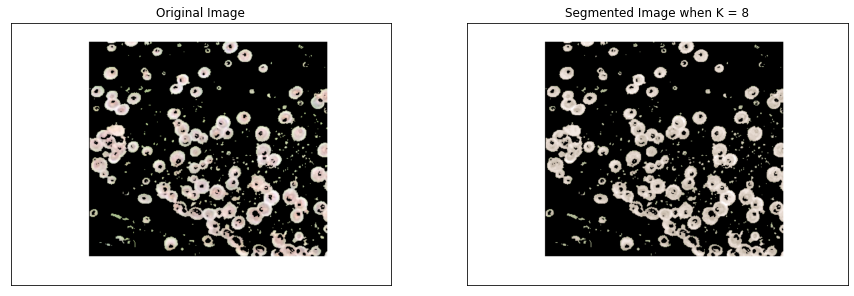

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

k = 2 -> Verde / Branco;

---


k = 3 -> Verde / Branco / Luminosidade;

---


k = 4 -> Verde / Branco / Luminosidade / Nucleo;


Erosão da imagem

Sintaxe: cv2.erode (src, kernel[, dst[, anchor[, iterações[, borderType[,


---


borderValue]]])Parâmetros:

---


src: É a imagem que deve ser erodida .


---


kernel: Um elemento estruturante usado para erosão. Se for utilizado o elemento = Mat(), um elemento estruturante retangular 3 x 3. O kernel pode ser criado usando o GetStructuringElement.


---


dst: É a imagem de saída do mesmo tamanho e tipo que src.


---


âncora: É uma variável de inteiro tipo representando ponto de âncora e seu valor padrão Ponto é (-1, -1) o que significa que a âncora está no centro do kernel.


---


borderType: Ele retrata que tipo de fronteira a ser adicionada. É definido por bandeiras como cv2. BORDER_CONSTANT, cv2. BORDER_REFLECT,etc.
iterações: É número de vezes que a erosão é aplicada.
borderValue: É o valor da fronteira em caso de uma fronteira constante.
Valor de retorno: Ele retorna uma imagem.

In [ ]:
# Window name in which image is displayed 
window_name = 'Image'
  
# Creating kernel
kernel = np.ones((2, 2), np.uint8)
  
# Using cv2.erode() method 
image = cv2.erode(original_image, kernel, cv2.BORDER_REFLECT) 

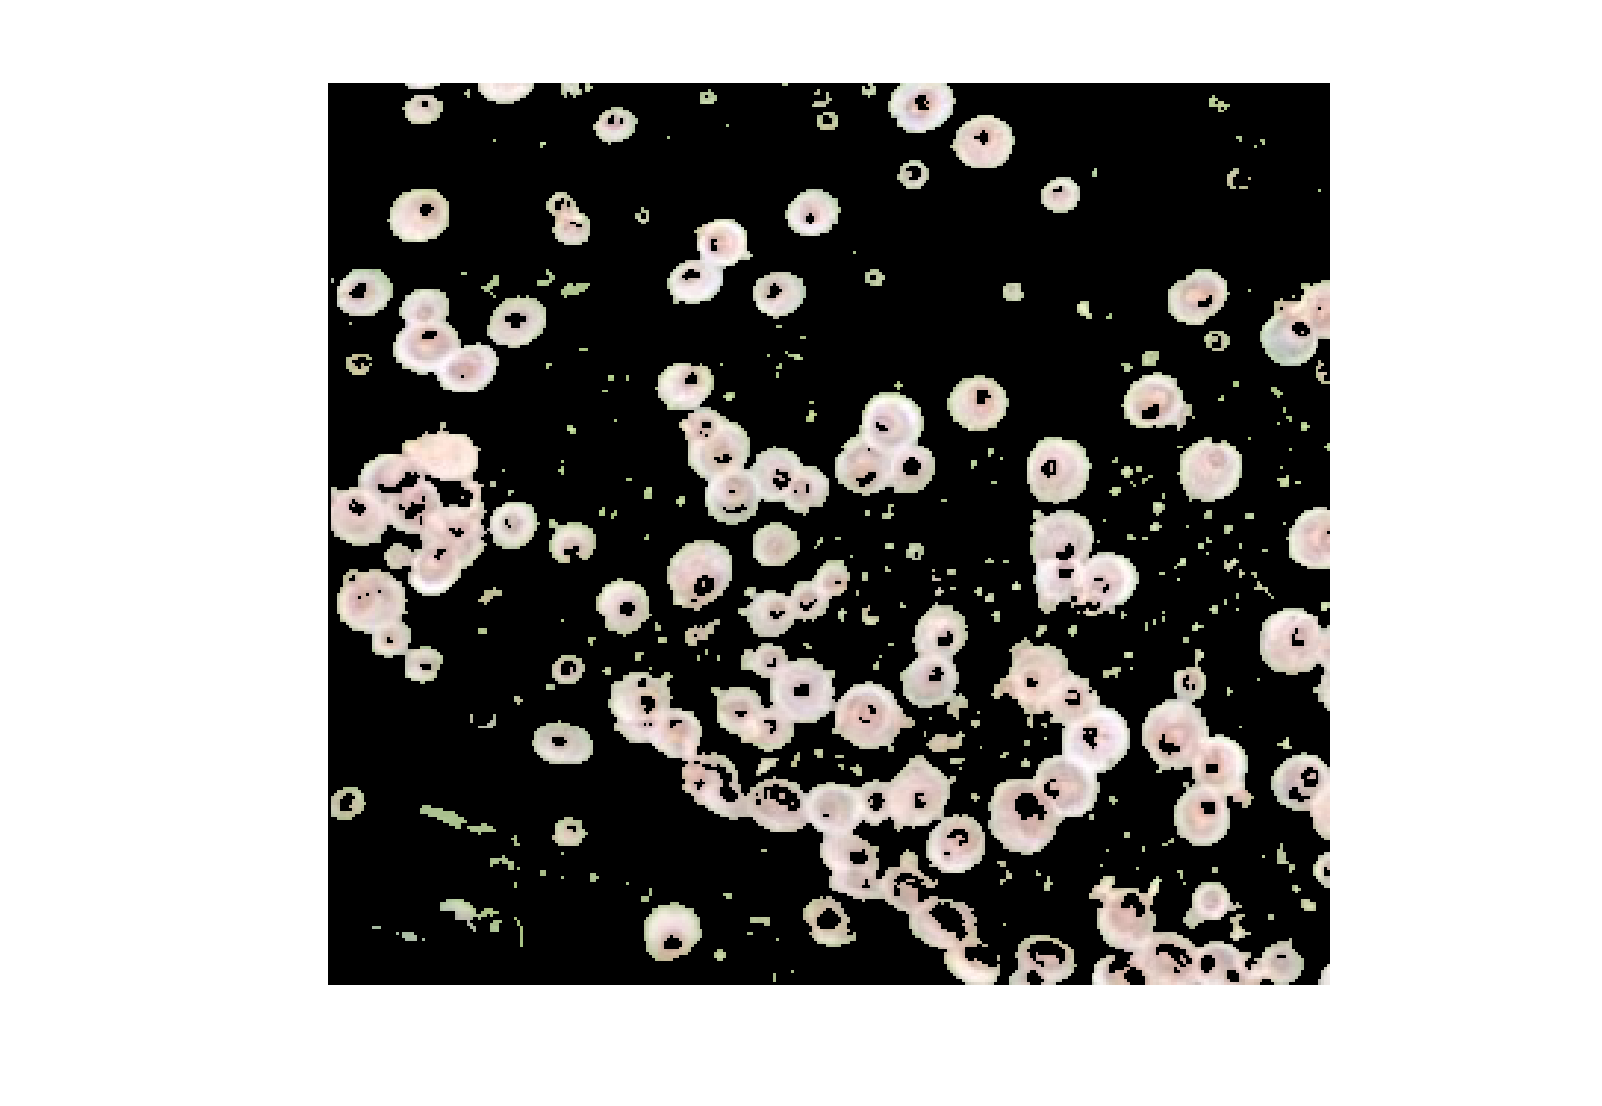

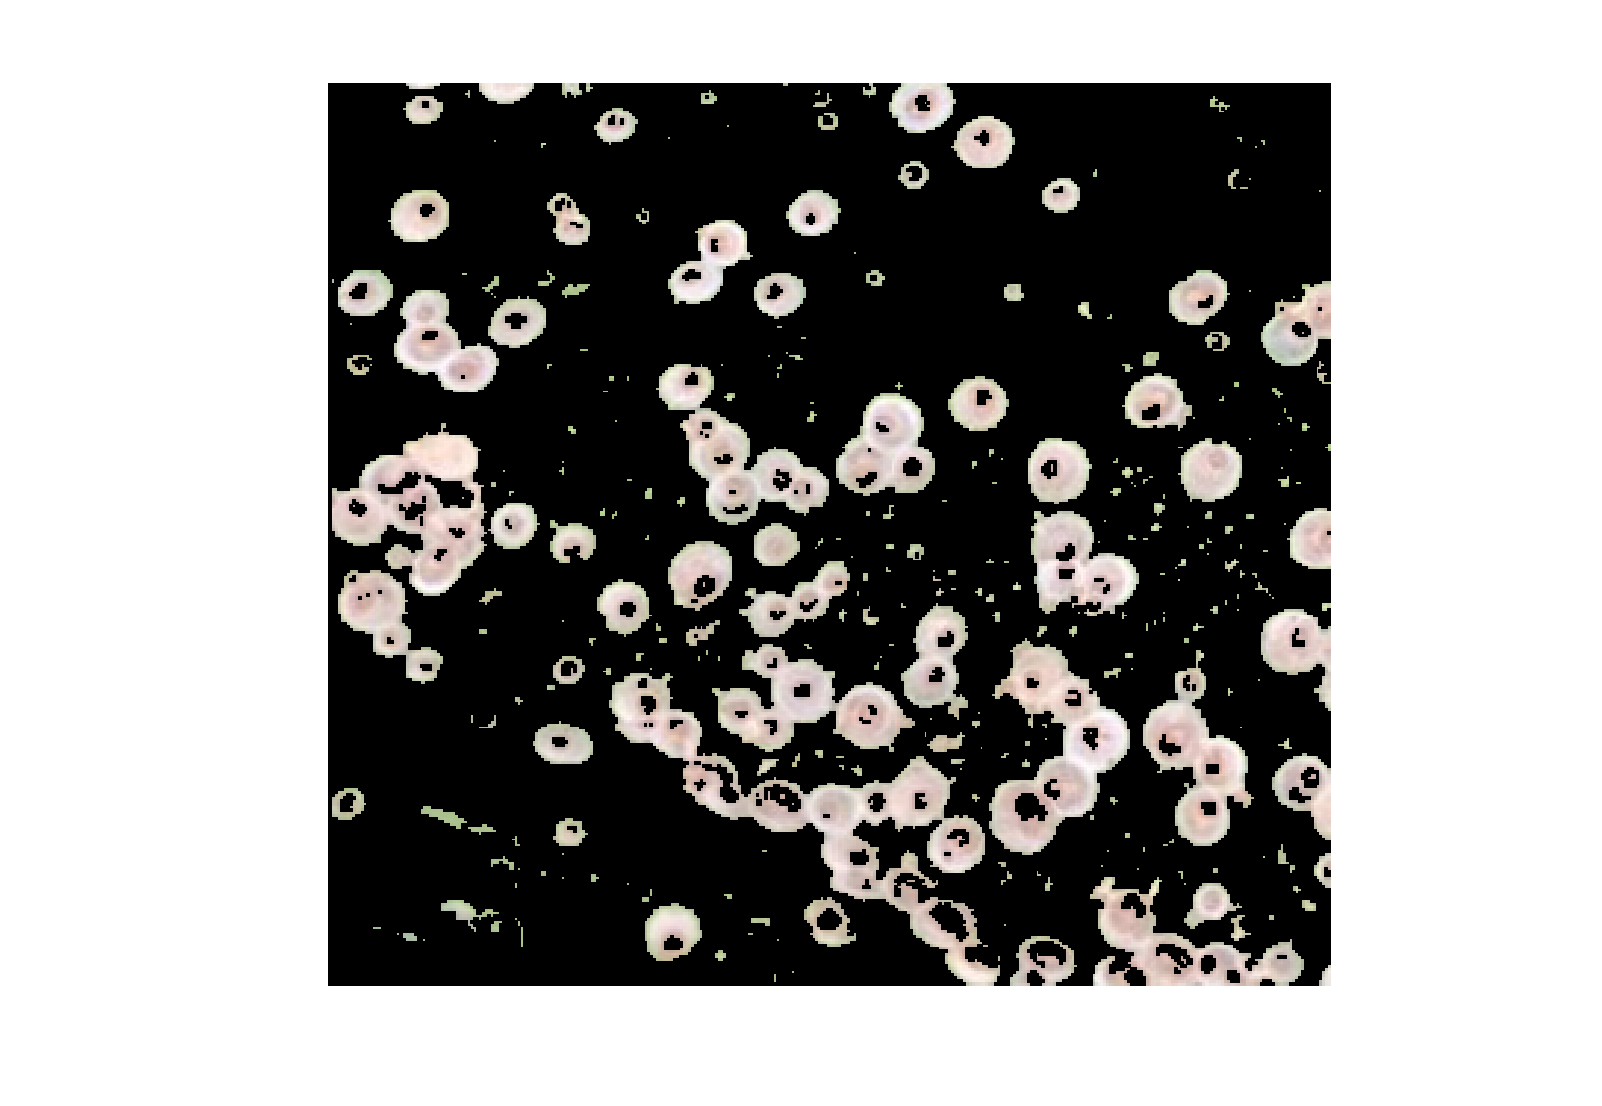

In [ ]:
from google.colab.patches import cv2_imshow
# Displaying the image
cv2_imshow(original_image)  
cv2_imshow(image) 